# 毕业论文`GRAD`
## 计算贡献值

---
*@author: Evan*\
*@date: 2023-12-03*

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

import sys
sys.path.append('../../../src/')
from namelist import *

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

## 时间序列

In [28]:
df = pd.read_excel('D:/data/Graduation/Contribution/contribution_hours.xlsx',index_col=0)
dfmda8 = df.rolling(8).mean().resample('D').max()

In [19]:
df.columns

Index(['sim_2014', 'obs_2014', 'sim_2015', 'obs_2015', 'sim_2016', 'obs_2016',
       'sim_2019', 'obs_2019', 'sim_2021', 'obs_2021', 'sim_2022', 'obs_2022',
       'sen_2019', 'sen_2021', 'sen_2022'],
      dtype='object')

In [30]:
obs = pd.concat([df['obs_2014'],df['obs_2015'],df['obs_2016'],
                 df['obs_2019'],df['obs_2021'],df['obs_2022']]).values
sim = pd.concat([df['sim_2014'],df['sim_2015'],df['sim_2016'],
                 df['sim_2019'],df['sim_2021'],df['sim_2022']]).values

obs_mda8 = pd.concat([dfmda8['obs_2014'],dfmda8['obs_2015'],dfmda8['obs_2016'],
                 dfmda8['obs_2019'],dfmda8['obs_2021'],dfmda8['obs_2022']]).values
sim_mda8 = pd.concat([dfmda8['sim_2014'],dfmda8['sim_2015'],dfmda8['sim_2016'],
                 dfmda8['sim_2019'],dfmda8['sim_2021'],dfmda8['sim_2022']]).values

In [38]:
obs_low_list  = ['obs_2014','obs_2015','obs_2016']
obs_high_list = ['obs_2019','obs_2021','obs_2022']
sim_low_list  = ['sim_2014','sim_2015','sim_2016']
sim_high_list = ['sim_2019','sim_2021','sim_2022']
sen_high_list = ['sen_2019','sen_2021','sen_2022']

obs_low  = dfmda8[obs_low_list].mean().mean()
obs_high = dfmda8[obs_high_list].mean().mean()
sim_low  = dfmda8[sim_low_list].mean().mean()
sim_high = dfmda8[sim_high_list].mean().mean()
sen_high = dfmda8[sen_high_list].mean().mean()

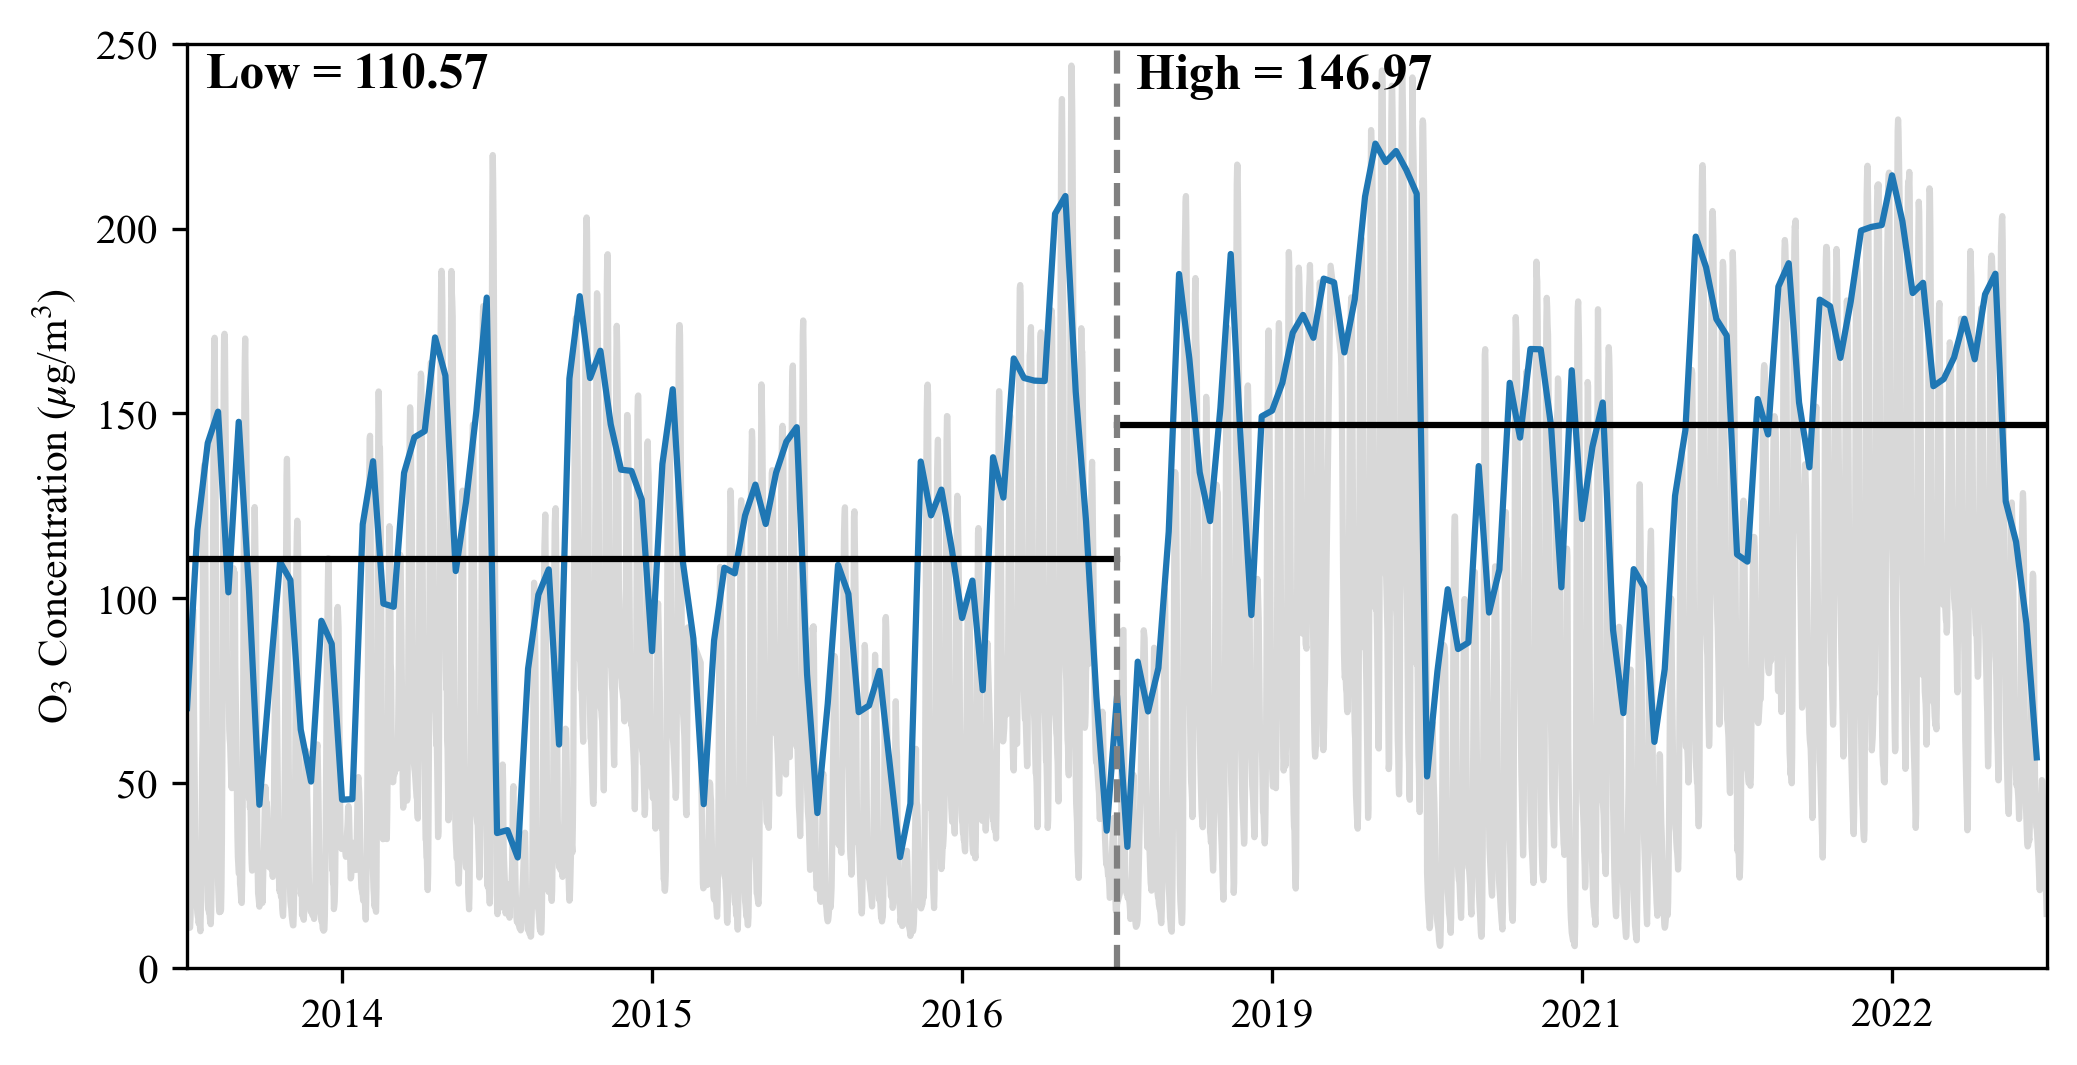

In [62]:
hstep = np.arange(0,4320,1)
dstep = np.arange(0,4320,24)

fig = plt.figure(figsize=(8, 4),dpi=300)
ax = fig.subplots(1,1)

ax.plot(hstep,obs,color='gray',alpha=0.3)
ax.plot(dstep,obs_mda8,)

ax.axhline(y=obs_low,xmin=0,xmax=0.5,color='k')
ax.axhline(y=obs_high,xmin=0.5,xmax=1,color='k')
ax.axvline(x=2160,linestyle='--',color='gray')

textdict = {'weight':'bold','size':12,'ha':'left','va':'top'}
ax.text(0.01,0.99,f'Low = {obs_low:.2f}',transform=ax.transAxes,**textdict)
ax.text(0.51,0.99,f'High = {obs_high:.2f}',transform=ax.transAxes,**textdict)

ax.set_xticks(np.arange(0,4320,24*30)+24*30/2)
ax.set_xticklabels([2014,2015,2016,2019,2021,2022])
ax.set_ylabel('O$_3$ Concentration ($\mu$g/m$^3$)')
ax.set_xlim(0,4320)
ax.set_ylim(0,250)
plt.show()

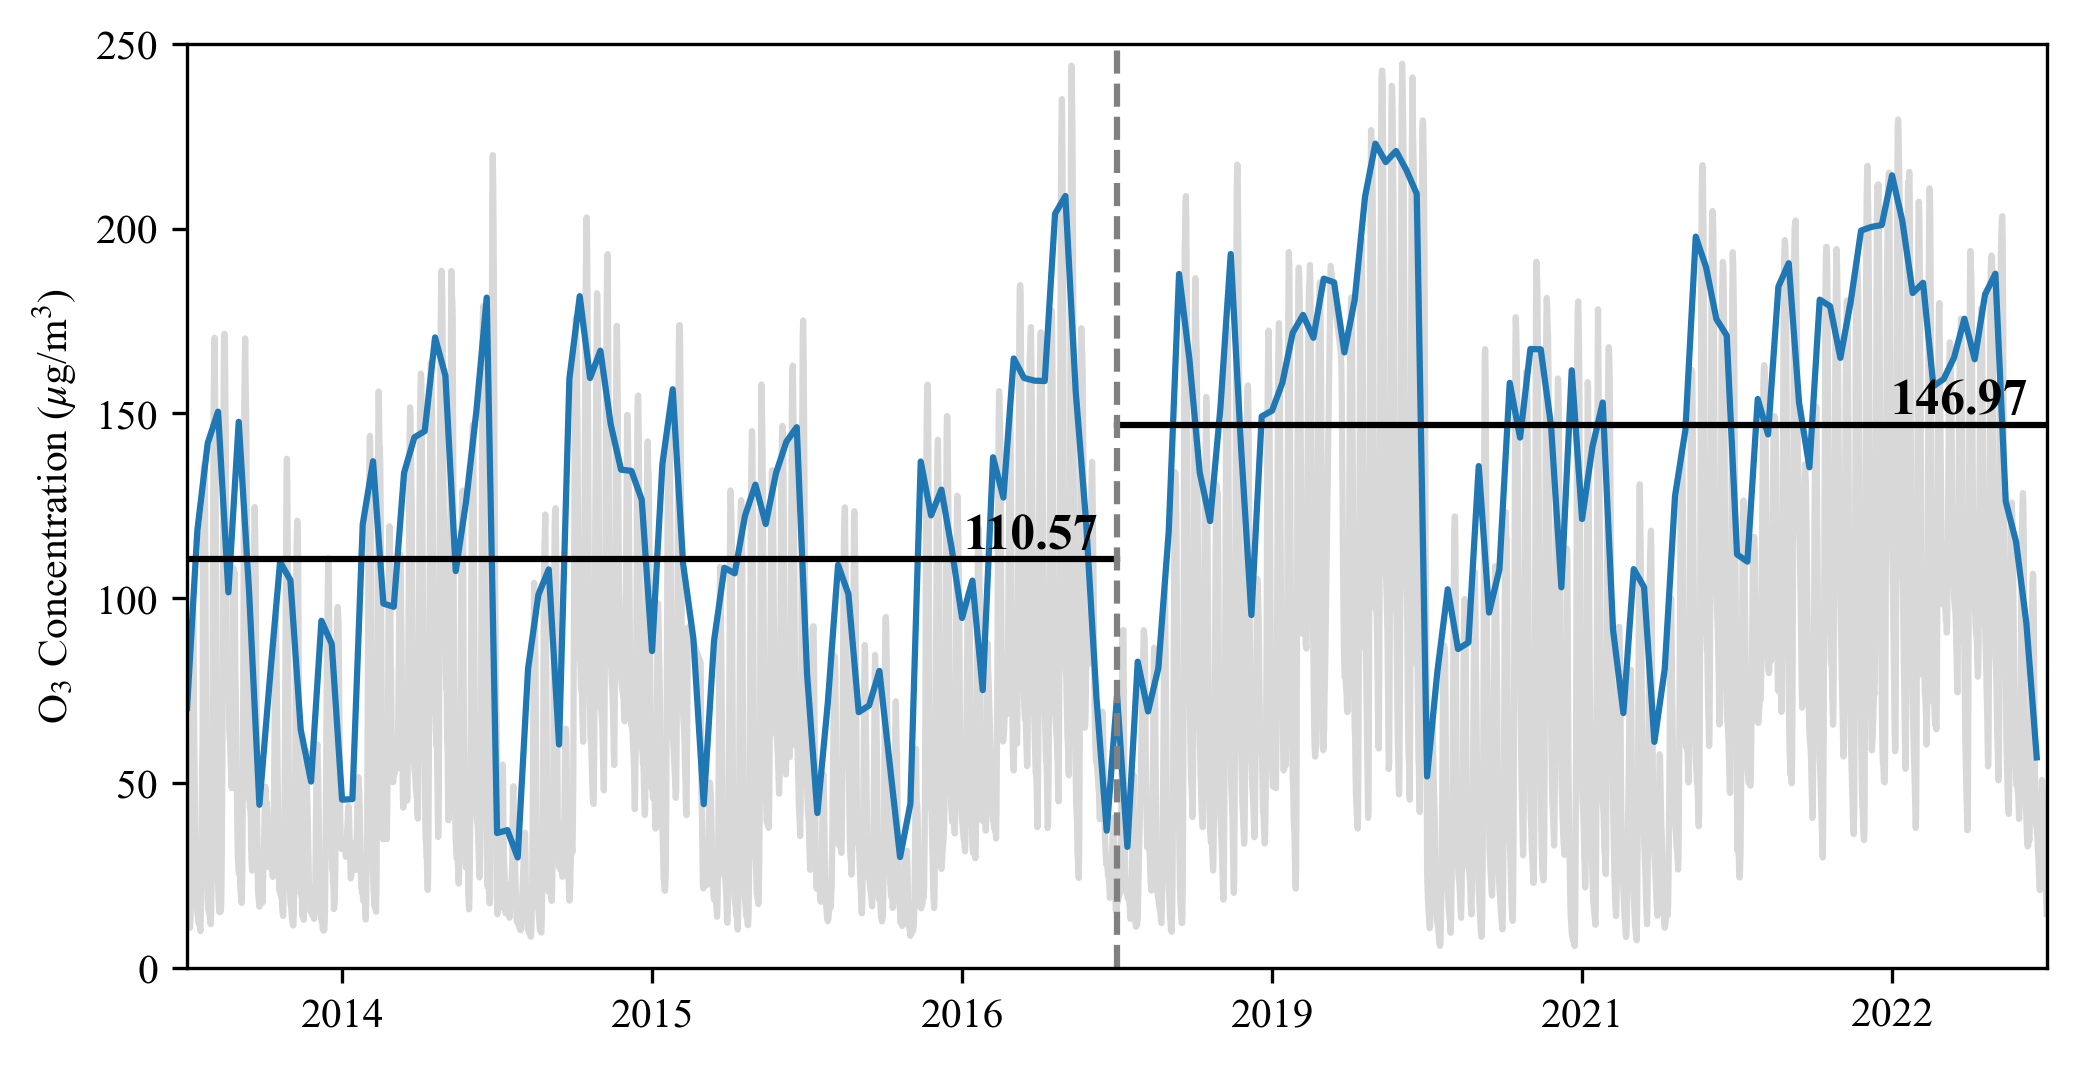

In [64]:
hstep = np.arange(0,4320,1)
dstep = np.arange(0,4320,24)

fig = plt.figure(figsize=(8, 4),dpi=300)
ax = fig.subplots(1,1)

ax.plot(hstep,obs,color='gray',alpha=0.3)
ax.plot(dstep,obs_mda8,)

ax.axhline(y=obs_low,xmin=0,xmax=0.5,color='k')
ax.axhline(y=obs_high,xmin=0.5,xmax=1,color='k')
ax.axvline(x=2160,linestyle='--',color='gray')

textdict = {'weight':'bold','size':12,'ha':'right','va':'bottom'}
ax.text(0.49,obs_low/250,f'{obs_low:.2f}',transform=ax.transAxes,**textdict)
ax.text(0.99,obs_high/250,f'{obs_high:.2f}',transform=ax.transAxes,**textdict)

ax.set_xticks(np.arange(0,4320,24*30)+24*30/2)
ax.set_xticklabels([2014,2015,2016,2019,2021,2022])
ax.set_ylabel('O$_3$ Concentration ($\mu$g/m$^3$)')
ax.set_xlim(0,4320)
ax.set_ylim(0,250)
plt.show()

## 柱状图

In [11]:
lr = pd.read_excel('D:/data/Graduation/Contribution/lr_results.xlsx',index_col=0)
lr

,original,lr_by_low,lr_by_high
obs_low,110.568835,73.373645,90.091582
obs_high,146.973477,100.148610,127.039030
sim_low,153.046076,104.614899,133.202174
sim_high,159.261713,109.186389,139.510488
sen_high,165.006398,113.411503,145.340828


In [12]:
obs_low  = lr['original']['obs_low']
obs_high = lr['original']['obs_high']
sim_low  = lr['lr_by_low']['sim_low']
sim_high = lr['lr_by_high']['sim_high']
sen_high = lr['lr_by_low']['sen_high']

In [7]:
delta_obs    = obs_high - obs_low
sen_del_low  = sen_high - sim_low
high_del_sen = sim_high - sen_high

print('ΔMET + ΔEMIS = {:.2f}'.format(delta_obs),
      '\nΔMET = {:.2f}'.format(sen_del_low),', {:.2f}%'.format(sen_del_low/delta_obs*100),
      '\nΔEMIS = {:.2f}'.format(high_del_sen),', {:.2f}%'.format(high_del_sen/delta_obs*100))

ΔMET + ΔEMIS = 36.40 
ΔMET = 8.80 , 24.16% 
ΔEMIS = 26.10 , 71.69%


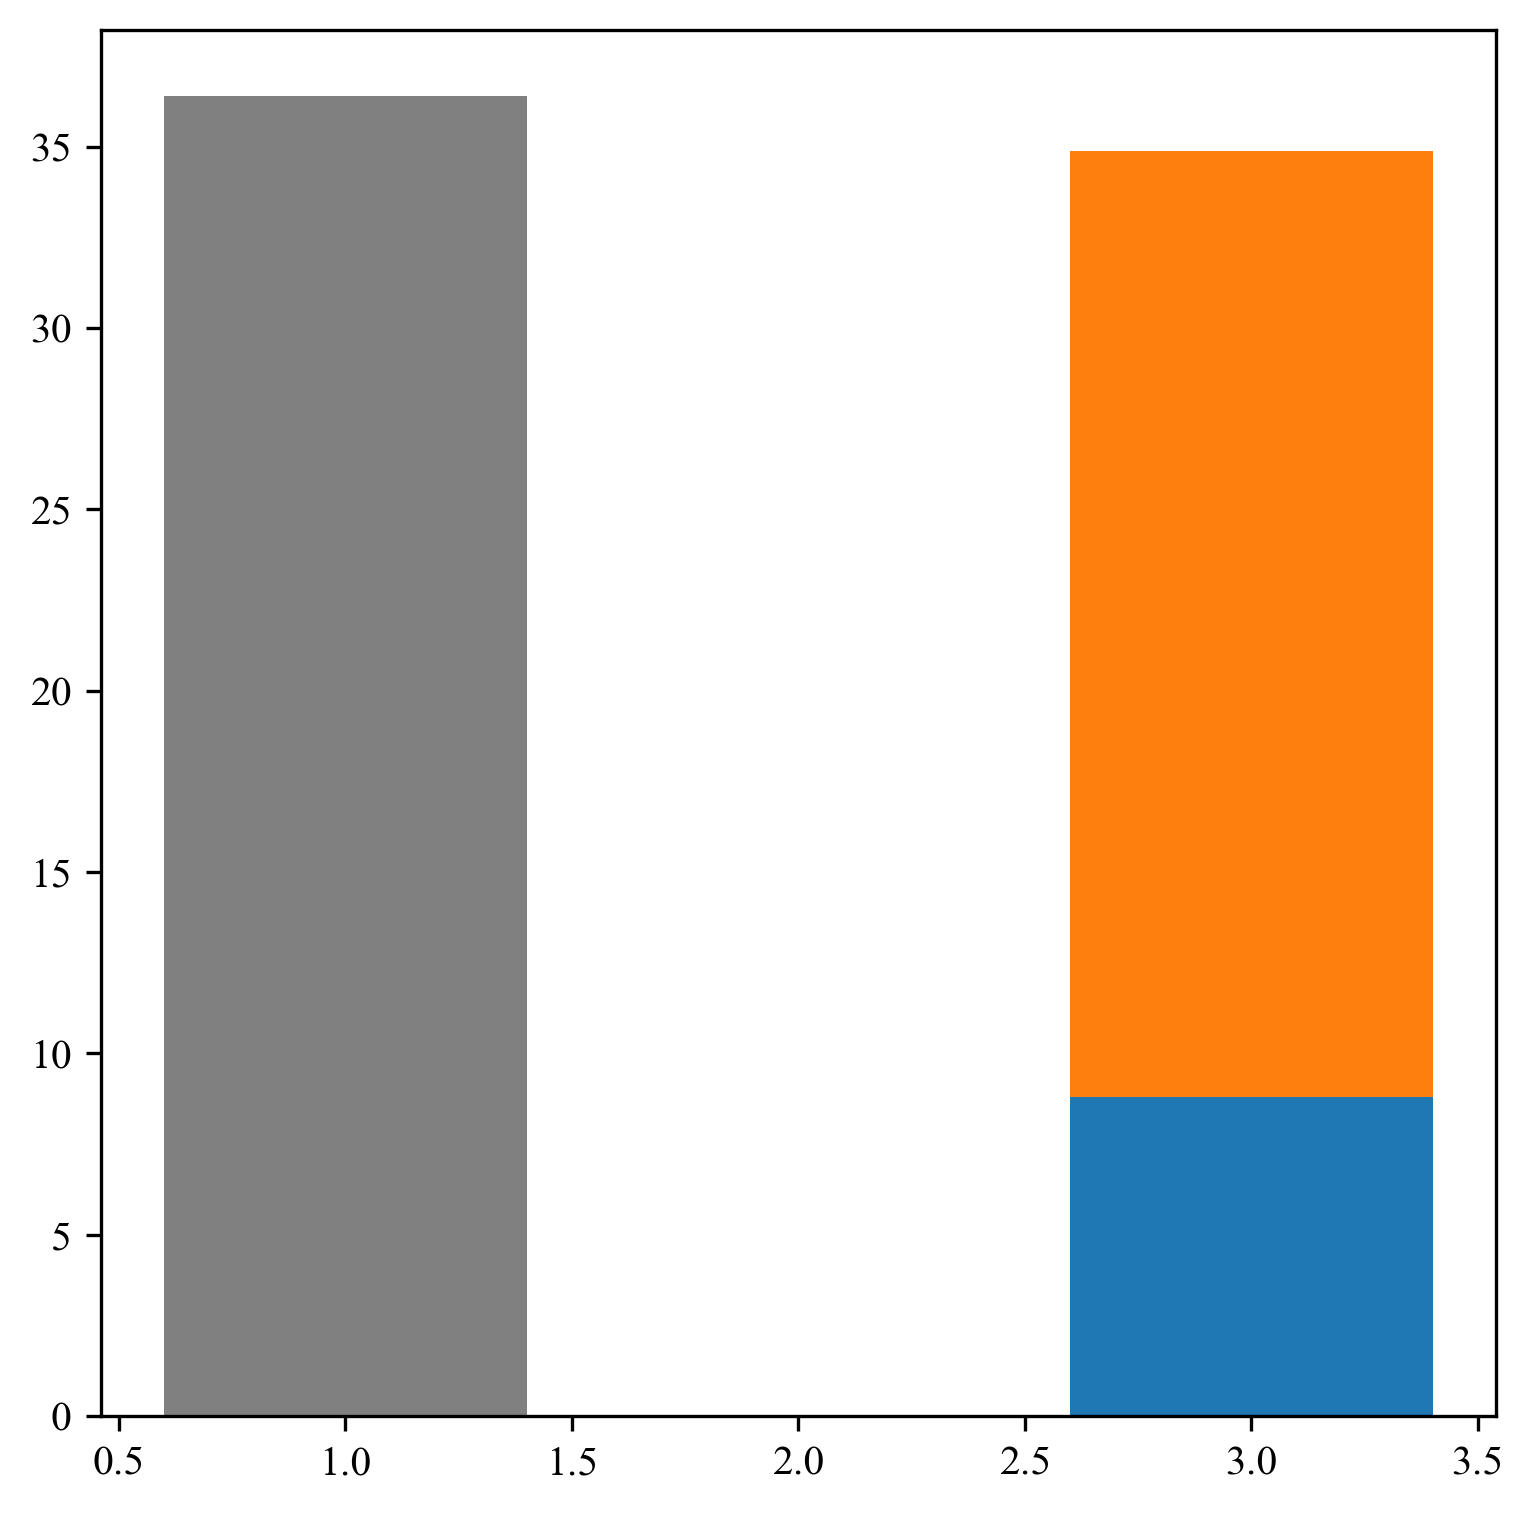

In [65]:
fig = plt.figure(figsize=(6, 6),dpi=300)
ax = fig.subplots(1,1)

ax.bar(3,sen_del_low,color='tab:blue',label='ΔMET')
ax.bar(3,high_del_sen,color='tab:orange',label='ΔEMIS',bottom=sen_del_low)
ax.bar(1,delta_obs,color='grey',label='ΔO$_3$')

plt.show()

## 将两张图拼接

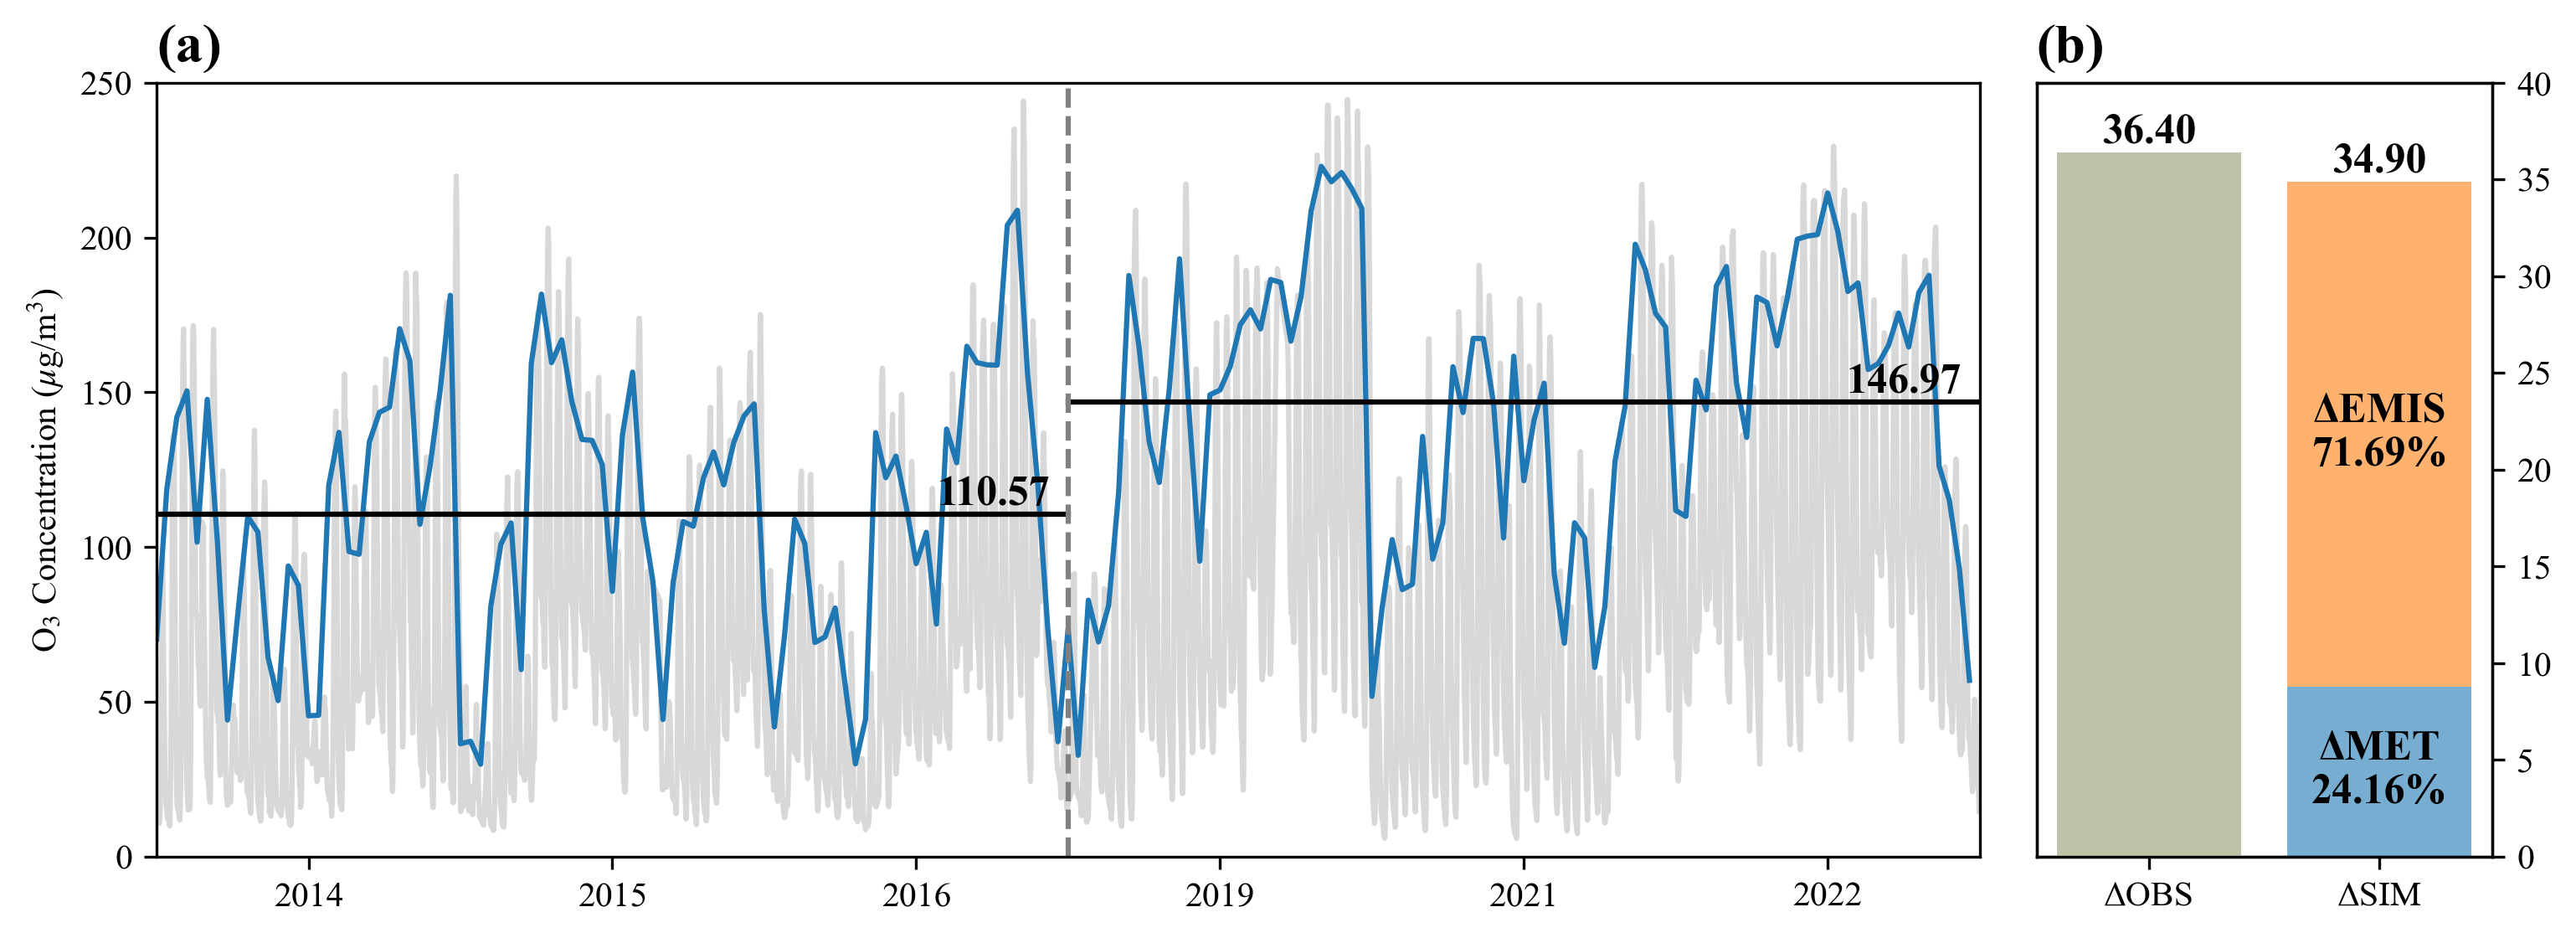

In [114]:
import matplotlib.gridspec as gridspec

# 第一幅图
hstep = np.arange(0, 4320, 1)
dstep = np.arange(0, 4320, 24)

fig = plt.figure(figsize=(12, 4), dpi=300)
gs = gridspec.GridSpec(1, 2, width_ratios=[4, 1])

ax1 = plt.subplot(gs[0])
ax1.plot(hstep, obs, color='gray', alpha=0.3)
ax1.plot(dstep, obs_mda8)
ax1.axhline(y=obs_low, xmin=0, xmax=0.5, color='k')
ax1.axhline(y=obs_high, xmin=0.5, xmax=1, color='k')
ax1.axvline(x=2160, linestyle='--', color='gray')
textdict1 = {'weight': 'bold', 'size': 12, 'ha': 'right', 'va': 'bottom'}
ax1.text(0.49, obs_low / 250, f'{obs_low:.2f}', transform=ax1.transAxes, **textdict1)
ax1.text(0.99, obs_high / 250, f'{obs_high:.2f}', transform=ax1.transAxes, **textdict1)
ax1.set_xticks(np.arange(0, 4320, 24*30) + 24*30/2)
ax1.set_xticklabels([2014, 2015, 2016, 2019, 2021, 2022])
ax1.set_ylabel('O$_3$ Concentration ($\mu$g/m$^3$)')
ax1.set_xlim(0, 4320)
ax1.set_ylim(0, 250)
ax1.set_title('(a)',loc='left',fontsize=16,fontweight='bold')

# 第二幅图
ax2 = plt.subplot(gs[1])
ax2.set_yticks([])

ax3 = ax2.twinx()
ax3.bar(1, delta_obs, color='#bfc1a9', label='ΔO$_3',alpha=1)
ax3.bar(2, sen_del_low, color='tab:blue', label='ΔMET',width=0.8,alpha=0.6)
ax3.bar(2, high_del_sen, color='tab:orange', label='ΔEMIS', bottom=sen_del_low,width=0.8,alpha=0.6)

# 柱顶的值
textdict2 = {'weight': 'bold', 'size': 12, 'ha': 'center', 'va': 'bottom'}
ax3.text(1,delta_obs, f'{delta_obs:.2f}',**textdict2)
ax3.text(2,sen_del_low+high_del_sen, f'{sen_del_low+high_del_sen:.2f}',**textdict2)

# 百分比值
textdict3 = {'weight': 'bold', 'size': 12, 'ha': 'center', 'va': 'center'}
ax3.text(2,sen_del_low/2, f'ΔMET\n{sen_del_low/delta_obs*100:.2f}%',**textdict3)
ax3.text(2,sen_del_low+high_del_sen/2, f'ΔEMIS\n{high_del_sen/delta_obs*100:.2f}%',**textdict3)

ax3.set_xticks([1, 2])
ax3.set_xticklabels(['ΔOBS', 'ΔSIM'])
ax3.set_ylim(0, 40)
ax3.set_title('(b)',loc='left',fontsize=16,fontweight='bold')

plt.subplots_adjust(wspace=0.05)
plt.show()

## 添加模拟数据折线

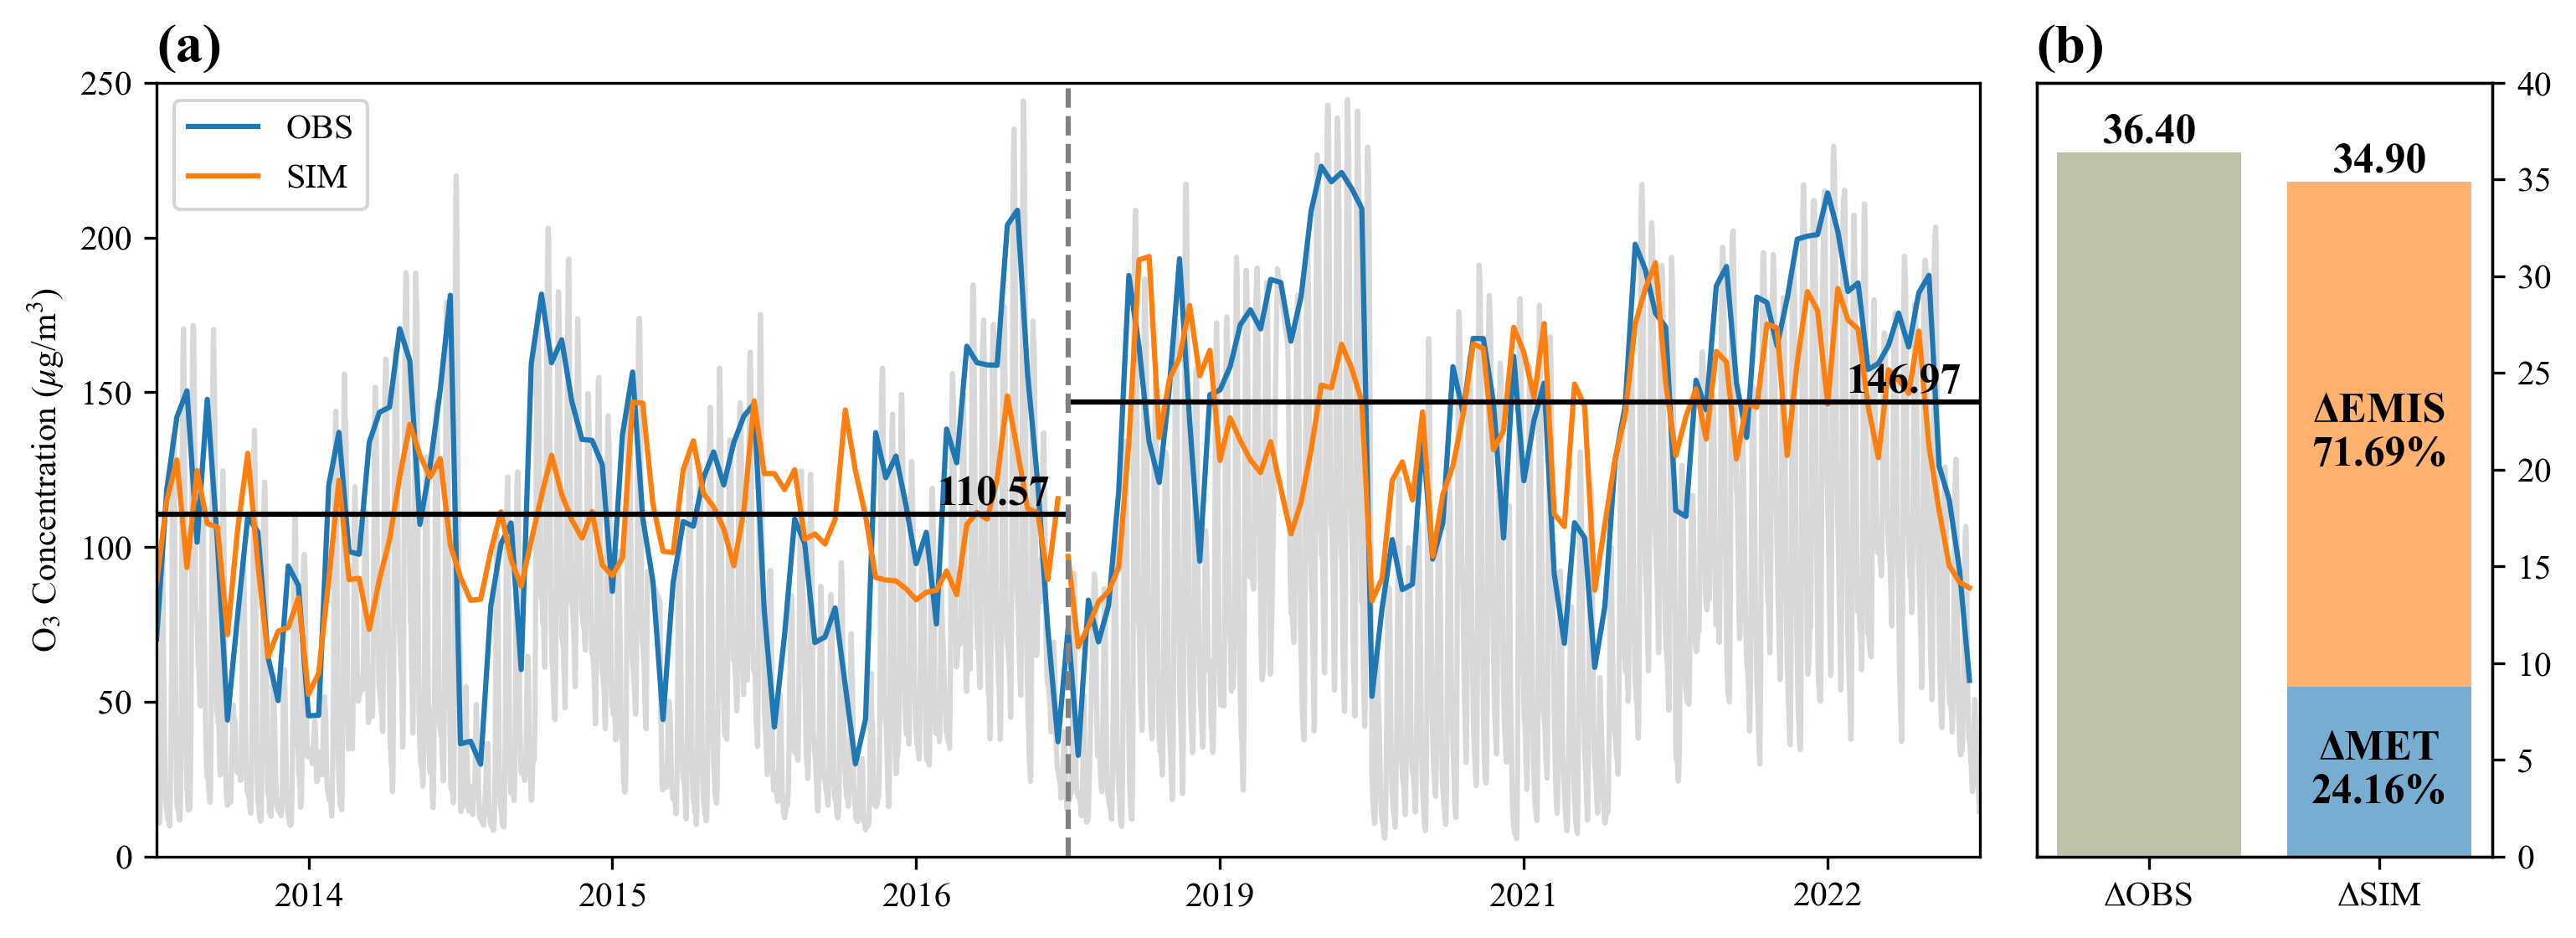

In [124]:
import matplotlib.gridspec as gridspec

# 第一幅图
hstep = np.arange(0, 4320, 1)
dstep = np.arange(0, 4320, 24)

fig = plt.figure(figsize=(12, 4), dpi=300)
gs = gridspec.GridSpec(1, 2, width_ratios=[4, 1])

ax1 = plt.subplot(gs[0])
ax1.plot(hstep, obs, color='gray', alpha=0.3)
ax1.plot(dstep, obs_mda8,label='OBS')

ax1.plot(dstep[:90], 0.74*sim_mda8[:90]-7.95,label='SIM',color='tab:orange')
ax1.plot(dstep[90:], 1.01*sim_mda8[90:]-22.13,color='tab:orange')
# ax1.plot(dstep[90:], sim_mda8[90:],color='tab:orange')

ax1.axhline(y=obs_low, xmin=0, xmax=0.5, color='k')
ax1.axhline(y=obs_high, xmin=0.5, xmax=1, color='k')
ax1.axvline(x=2160, linestyle='--', color='gray')
textdict1 = {'weight': 'bold', 'size': 12, 'ha': 'right', 'va': 'bottom'}
ax1.text(0.49, obs_low / 250, f'{obs_low:.2f}', transform=ax1.transAxes, **textdict1)
ax1.text(0.99, obs_high / 250, f'{obs_high:.2f}', transform=ax1.transAxes, **textdict1)
ax1.set_xticks(np.arange(0, 4320, 24*30) + 24*30/2)
ax1.set_xticklabels([2014, 2015, 2016, 2019, 2021, 2022])
ax1.set_ylabel('O$_3$ Concentration ($\mu$g/m$^3$)')
ax1.set_xlim(0, 4320)
ax1.set_ylim(0, 250)
ax1.set_title('(a)',loc='left',fontsize=16,fontweight='bold')
ax1.legend(loc=2)

# 第二幅图
ax2 = plt.subplot(gs[1])
ax2.set_yticks([])

ax3 = ax2.twinx()
ax3.bar(1, delta_obs, color='#bfc1a9', label='ΔO$_3',alpha=1)
ax3.bar(2, sen_del_low, color='tab:blue', label='ΔMET',width=0.8,alpha=0.6)
ax3.bar(2, high_del_sen, color='tab:orange', label='ΔEMIS', bottom=sen_del_low,width=0.8,alpha=0.6)

# 柱顶的值
textdict2 = {'weight': 'bold', 'size': 12, 'ha': 'center', 'va': 'bottom'}
ax3.text(1,delta_obs, f'{delta_obs:.2f}',**textdict2)
ax3.text(2,sen_del_low+high_del_sen, f'{sen_del_low+high_del_sen:.2f}',**textdict2)

# 百分比值
textdict3 = {'weight': 'bold', 'size': 12, 'ha': 'center', 'va': 'center'}
ax3.text(2,sen_del_low/2, f'ΔMET\n{sen_del_low/delta_obs*100:.2f}%',**textdict3)
ax3.text(2,sen_del_low+high_del_sen/2, f'ΔEMIS\n{high_del_sen/delta_obs*100:.2f}%',**textdict3)

ax3.set_xticks([1, 2])
ax3.set_xticklabels(['ΔOBS', 'ΔSIM'])
ax3.set_ylim(0, 40)
ax3.set_title('(b)',loc='left',fontsize=16,fontweight='bold')

plt.subplots_adjust(wspace=0.05)
plt.show()